In [84]:
!pip install kagglehub

In [27]:
!pip uninstall torch torchvision torchaudio

^C


In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.


In [86]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smaranjitghose/corn-or-maize-leaf-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\smaranjitghose\corn-or-maize-leaf-disease-dataset\versions\1


In [ ]:
!pip install vit-pytorch

  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached filelock-3.17.0-py3-none-any.whl (16 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached sympy-1.13.3-py3-none-any.whl (6.2 MB)
Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl (15 kB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lpips 0.1.4 requires scipy>=1.0.1, which is not installed.
visdom 0.2.4 requires jsonpatch, which is not installed.
visdom 0.2.4 requires scipy, which is not installed.
visdom 0.2.4 requires websocket-client, which is not installed.


In [18]:
import os
import shutil
from torchvision import datasets, transforms
from torch.utils.data import random_split

# Define the transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Load the dataset
dataset_dir = r'D:\PENELITIAN\PENELITIAN - DIASH - HERBAL\Medicinal Leaf Dataset'
full_dataset = datasets.ImageFolder(dataset_dir, transform=transform)

# Define the split sizes
train_size = int(0.7 * len(full_dataset))  # 70% for training
val_size = int(0.15 * len(full_dataset))   # 15% for validation
test_size = len(full_dataset) - train_size - val_size  # Remaining 15% for testing

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Function to copy files to new directory structure
def copy_files(split_dataset, original_dataset, target_dir):
    # Create target directory if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)
    
    # Get the original file paths and classes
    original_paths = [s[0] for s in original_dataset.samples]
    original_classes = [s[1] for s in original_dataset.samples]
    class_names = original_dataset.classes
    
    for idx in split_dataset.indices:
        src_path = original_paths[idx]
        class_name = class_names[original_classes[idx]]
        
        # Create class directory in target dir if it doesn't exist
        class_dir = os.path.join(target_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
        
        # Copy file
        dst_path = os.path.join(class_dir, os.path.basename(src_path))
        shutil.copy2(src_path, dst_path)

# Define output directories
output_dir = r'D:\PENELITIAN\PENELITIAN - DIASH - HERBAL\Medicinal Leaf Dataset Split'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Copy files to new directories
copy_files(train_dataset, full_dataset, train_dir)
copy_files(val_dataset, full_dataset, val_dir)
copy_files(test_dataset, full_dataset, test_dir)

print("Dataset successfully split and copied to:")
print(f"Train: {train_dir}")
print(f"Validation: {val_dir}")
print(f"Test: {test_dir}")

Dataset successfully split and copied to:
Train: D:\PENELITIAN\PENELITIAN - DIASH - HERBAL\Medicinal Leaf Dataset Split\train
Validation: D:\PENELITIAN\PENELITIAN - DIASH - HERBAL\Medicinal Leaf Dataset Split\val
Test: D:\PENELITIAN\PENELITIAN - DIASH - HERBAL\Medicinal Leaf Dataset Split\test


In [19]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Define dataset directories
base_dir = r'D:\PENELITIAN\PENELITIAN - DIASH - HERBAL\Medicinal Leaf Dataset Split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Load datasets from separate folders
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
valloader = DataLoader(val_dataset, batch_size=4, shuffle=True, num_workers=4)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=4)

# Print dataset sizes
print(f"Train size: {len(train_dataset)} samples, {len(train_dataset.classes)} classes")
print(f"Validation size: {len(val_dataset)} samples")
print(f"Test size: {len(test_dataset)} samples")

# Print class names (should be the same for all splits)
print("\nClass names:", train_dataset.classes)

Train size: 1284 samples, 30 classes
Validation size: 275 samples
Test size: 276 samples

Class names: ['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Cr

In [20]:
import torch
print(torch.cuda.is_available())  # Harus mengembalikan True jika CUDA tersedia


True


In [21]:
# Zufar's code
import torch
from vit_pytorch.cait import CaiT

v = CaiT(
    image_size = 256,
    patch_size = 32,
    num_classes = 30,
    dim = 1024,
    depth = 12,             # depth of transformer for patch to patch attention only
    cls_depth = 2,          # depth of cross attention of CLS tokens to patch
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1,
    layer_dropout = 0.05    # randomly dropout 5% of the layers
)

In [22]:
# Menampilkan label dari dataset
print(full_dataset.classes)

['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']


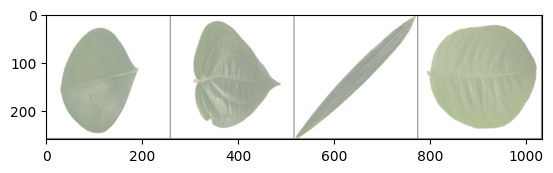

Carissa Carandas (Karanda) Piper Betle (Betel) Alpinia Galanga (Rasna) Psidium Guajava (Guava)


In [8]:
import numpy as np
import torchvision

import matplotlib.pyplot as plt

# Ambil batch pertama dari train_loader
data_iter = iter(trainloader)
images, labels = next(data_iter)

# Fungsi untuk menampilkan gambar
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Tampilkan grid gambar
imshow(torchvision.utils.make_grid(images))

# Tampilkan label
classes = ['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [23]:
v.to(device)

CaiT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=32, p2=32)
    (1): LayerNorm((3072,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=3072, out_features=1024, bias=True)
    (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (patch_transformer): Transformer(
    (layers): ModuleList(
      (0-11): 12 x ModuleList(
        (0): LayerScale(
          (fn): Attention(
            (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (to_q): Linear(in_features=1024, out_features=1024, bias=False)
            (to_kv): Linear(in_features=1024, out_features=2048, bias=False)
            (attend): Softmax(dim=-1)
            (dropout): Dropout(p=0.1, inplace=False)
            (to_out): Sequential(
              (0): Linear(in_features=1024, out_features=1024, bias=True)
              (1): Dropout(p=0.1, inplace=False)
            )
         

Kode Zufar

Kode Zufar + GPT tambahin akurasi doang

Epoch 1/100: 321it [00:11, 27.93it/s]


Epoch [1/100], Training Accuracy: 13.55%, Training Loss: 3.3967
Epoch [1/100], Validation Accuracy: 20.73%, Validation Loss: 2.5825


Epoch 2/100: 321it [00:11, 28.42it/s]


Epoch [2/100], Training Accuracy: 33.57%, Training Loss: 2.3368
Epoch [2/100], Validation Accuracy: 44.36%, Validation Loss: 1.8137


Epoch 3/100: 321it [00:11, 28.71it/s]


Epoch [3/100], Training Accuracy: 47.90%, Training Loss: 1.8466
Epoch [3/100], Validation Accuracy: 44.73%, Validation Loss: 2.2017


Epoch 4/100: 321it [00:11, 28.59it/s]


Epoch [4/100], Training Accuracy: 47.66%, Training Loss: 1.8030
Epoch [4/100], Validation Accuracy: 45.82%, Validation Loss: 1.7417


Epoch 5/100: 321it [00:11, 29.09it/s]


Epoch [5/100], Training Accuracy: 52.96%, Training Loss: 1.5748
Epoch [5/100], Validation Accuracy: 48.73%, Validation Loss: 1.8449


Epoch 6/100: 321it [00:11, 28.86it/s]


Epoch [6/100], Training Accuracy: 57.55%, Training Loss: 1.4422
Epoch [6/100], Validation Accuracy: 39.64%, Validation Loss: 2.4053


Epoch 7/100: 321it [00:11, 28.88it/s]


Epoch [7/100], Training Accuracy: 57.09%, Training Loss: 1.4628
Epoch [7/100], Validation Accuracy: 45.09%, Validation Loss: 1.9786


Epoch 8/100: 321it [00:11, 28.75it/s]


Epoch [8/100], Training Accuracy: 59.03%, Training Loss: 1.3633
Epoch [8/100], Validation Accuracy: 52.73%, Validation Loss: 1.6790


Epoch 9/100: 321it [00:11, 28.87it/s]


Epoch [9/100], Training Accuracy: 65.81%, Training Loss: 1.1632
Epoch [9/100], Validation Accuracy: 53.82%, Validation Loss: 1.5515


Epoch 10/100: 321it [00:11, 28.55it/s]


Epoch [10/100], Training Accuracy: 64.88%, Training Loss: 1.2146
Epoch [10/100], Validation Accuracy: 54.18%, Validation Loss: 1.7022


Epoch 11/100: 321it [00:11, 29.10it/s]


Epoch [11/100], Training Accuracy: 66.67%, Training Loss: 1.0455
Epoch [11/100], Validation Accuracy: 58.91%, Validation Loss: 1.7576


Epoch 12/100: 321it [00:11, 28.44it/s]


Epoch [12/100], Training Accuracy: 64.17%, Training Loss: 1.1801
Epoch [12/100], Validation Accuracy: 59.64%, Validation Loss: 1.6354


Epoch 13/100: 321it [00:11, 28.27it/s]


Epoch [13/100], Training Accuracy: 65.81%, Training Loss: 1.1397
Epoch [13/100], Validation Accuracy: 60.36%, Validation Loss: 1.4934


Epoch 14/100: 321it [00:11, 27.38it/s]


Epoch [14/100], Training Accuracy: 66.82%, Training Loss: 1.0764
Epoch [14/100], Validation Accuracy: 64.36%, Validation Loss: 1.3934


Epoch 15/100: 321it [00:11, 28.40it/s]


Epoch [15/100], Training Accuracy: 70.17%, Training Loss: 0.9413
Epoch [15/100], Validation Accuracy: 53.09%, Validation Loss: 1.7254


Epoch 16/100: 321it [00:11, 28.93it/s]


Epoch [16/100], Training Accuracy: 63.79%, Training Loss: 1.1276
Epoch [16/100], Validation Accuracy: 62.91%, Validation Loss: 1.2129


Epoch 17/100: 321it [00:11, 29.13it/s]


Epoch [17/100], Training Accuracy: 71.50%, Training Loss: 0.9121
Epoch [17/100], Validation Accuracy: 70.91%, Validation Loss: 1.0585


Epoch 18/100: 321it [00:11, 28.40it/s]


Epoch [18/100], Training Accuracy: 75.00%, Training Loss: 0.7927
Epoch [18/100], Validation Accuracy: 61.45%, Validation Loss: 1.3765


Epoch 19/100: 321it [00:11, 28.40it/s]


Epoch [19/100], Training Accuracy: 77.88%, Training Loss: 0.7153
Epoch [19/100], Validation Accuracy: 61.09%, Validation Loss: 1.3067


Epoch 20/100: 321it [00:11, 28.53it/s]


Epoch [20/100], Training Accuracy: 75.55%, Training Loss: 0.7652
Epoch [20/100], Validation Accuracy: 59.64%, Validation Loss: 1.2768


Epoch 21/100: 321it [00:11, 28.68it/s]


Epoch [21/100], Training Accuracy: 72.27%, Training Loss: 0.8862
Epoch [21/100], Validation Accuracy: 67.27%, Validation Loss: 1.1668


Epoch 22/100: 321it [00:11, 28.43it/s]


Epoch [22/100], Training Accuracy: 78.97%, Training Loss: 0.6375
Epoch [22/100], Validation Accuracy: 66.55%, Validation Loss: 1.2053


Epoch 23/100: 321it [00:11, 28.06it/s]


Epoch [23/100], Training Accuracy: 77.57%, Training Loss: 0.7319
Epoch [23/100], Validation Accuracy: 64.36%, Validation Loss: 1.3358


Epoch 24/100: 321it [00:11, 28.68it/s]


Epoch [24/100], Training Accuracy: 78.97%, Training Loss: 0.6530
Epoch [24/100], Validation Accuracy: 61.09%, Validation Loss: 1.2171


Epoch 25/100: 321it [00:11, 28.51it/s]


Epoch [25/100], Training Accuracy: 68.07%, Training Loss: 1.0888
Epoch [25/100], Validation Accuracy: 39.64%, Validation Loss: 3.0510


Epoch 26/100: 321it [00:11, 28.80it/s]


Epoch [26/100], Training Accuracy: 8.96%, Training Loss: 3.3744
Epoch [26/100], Validation Accuracy: 4.36%, Validation Loss: 3.4800


Epoch 27/100: 321it [00:11, 29.08it/s]


Epoch [27/100], Training Accuracy: 7.40%, Training Loss: 3.3861
Epoch [27/100], Validation Accuracy: 6.18%, Validation Loss: 3.3232


Epoch 28/100: 321it [00:11, 28.02it/s]


Epoch [28/100], Training Accuracy: 7.40%, Training Loss: 3.4057
Epoch [28/100], Validation Accuracy: 2.18%, Validation Loss: 3.3882


Epoch 29/100: 321it [00:11, 27.36it/s]


Epoch [29/100], Training Accuracy: 4.05%, Training Loss: 3.4750
Epoch [29/100], Validation Accuracy: 5.09%, Validation Loss: 3.3722


Epoch 30/100: 321it [00:11, 27.40it/s]


Epoch [30/100], Training Accuracy: 5.14%, Training Loss: 3.4350
Epoch [30/100], Validation Accuracy: 6.55%, Validation Loss: 3.3830


Epoch 31/100: 321it [00:11, 29.13it/s]


Epoch [31/100], Training Accuracy: 5.30%, Training Loss: 3.4333
Epoch [31/100], Validation Accuracy: 4.36%, Validation Loss: 3.3698


Epoch 32/100: 321it [00:11, 28.48it/s]


Epoch [32/100], Training Accuracy: 5.76%, Training Loss: 3.4111
Epoch [32/100], Validation Accuracy: 6.18%, Validation Loss: 3.4271


Epoch 33/100: 321it [00:11, 28.86it/s]


Epoch [33/100], Training Accuracy: 6.46%, Training Loss: 3.4286
Epoch [33/100], Validation Accuracy: 5.09%, Validation Loss: 3.4006


Epoch 34/100: 321it [00:11, 28.24it/s]


Epoch [34/100], Training Accuracy: 6.31%, Training Loss: 3.4164
Epoch [34/100], Validation Accuracy: 1.82%, Validation Loss: 3.4404


Epoch 35/100: 321it [00:11, 28.84it/s]


Epoch [35/100], Training Accuracy: 4.83%, Training Loss: 3.4158
Epoch [35/100], Validation Accuracy: 4.73%, Validation Loss: 3.3724


Epoch 36/100: 321it [00:11, 28.81it/s]


Epoch [36/100], Training Accuracy: 6.39%, Training Loss: 3.4163
Epoch [36/100], Validation Accuracy: 6.91%, Validation Loss: 3.3990


Epoch 37/100: 321it [00:11, 28.86it/s]


Epoch [37/100], Training Accuracy: 5.14%, Training Loss: 3.3934
Epoch [37/100], Validation Accuracy: 5.09%, Validation Loss: 3.3805


Epoch 38/100: 321it [00:11, 29.03it/s]


Epoch [38/100], Training Accuracy: 5.76%, Training Loss: 3.3923
Epoch [38/100], Validation Accuracy: 2.91%, Validation Loss: 3.3693


Epoch 39/100: 321it [00:11, 28.61it/s]


Epoch [39/100], Training Accuracy: 5.45%, Training Loss: 3.3950
Epoch [39/100], Validation Accuracy: 5.82%, Validation Loss: 3.4107


Epoch 40/100: 321it [00:11, 28.62it/s]


Epoch [40/100], Training Accuracy: 5.37%, Training Loss: 3.3924
Epoch [40/100], Validation Accuracy: 5.45%, Validation Loss: 3.3814


Epoch 41/100: 321it [00:11, 28.33it/s]


Epoch [41/100], Training Accuracy: 5.61%, Training Loss: 3.3939
Epoch [41/100], Validation Accuracy: 4.36%, Validation Loss: 3.3724


Epoch 42/100: 321it [00:11, 29.06it/s]


Epoch [42/100], Training Accuracy: 5.92%, Training Loss: 3.3799
Epoch [42/100], Validation Accuracy: 5.45%, Validation Loss: 3.3696


Epoch 43/100: 321it [00:11, 28.84it/s]


Epoch [43/100], Training Accuracy: 5.69%, Training Loss: 3.3774
Epoch [43/100], Validation Accuracy: 6.18%, Validation Loss: 3.3852


Epoch 44/100: 321it [00:11, 28.46it/s]


Epoch [44/100], Training Accuracy: 6.15%, Training Loss: 3.3724
Epoch [44/100], Validation Accuracy: 5.09%, Validation Loss: 3.3842


Epoch 45/100: 321it [00:11, 27.68it/s]


Epoch [45/100], Training Accuracy: 6.00%, Training Loss: 3.3724
Epoch [45/100], Validation Accuracy: 6.18%, Validation Loss: 3.3817


Epoch 46/100: 321it [00:11, 28.17it/s]


Epoch [46/100], Training Accuracy: 5.30%, Training Loss: 3.3784
Epoch [46/100], Validation Accuracy: 6.55%, Validation Loss: 3.3685


Epoch 47/100: 321it [00:11, 28.52it/s]


Epoch [47/100], Training Accuracy: 6.15%, Training Loss: 3.3743
Epoch [47/100], Validation Accuracy: 4.00%, Validation Loss: 3.3811


Epoch 48/100: 321it [00:11, 28.88it/s]


Epoch [48/100], Training Accuracy: 6.07%, Training Loss: 3.3692
Epoch [48/100], Validation Accuracy: 6.55%, Validation Loss: 3.3812


Epoch 49/100: 321it [00:11, 29.00it/s]


Epoch [49/100], Training Accuracy: 5.69%, Training Loss: 3.3666
Epoch [49/100], Validation Accuracy: 6.55%, Validation Loss: 3.3803


Epoch 50/100: 321it [00:11, 28.33it/s]


Epoch [50/100], Training Accuracy: 5.53%, Training Loss: 3.3669
Epoch [50/100], Validation Accuracy: 6.55%, Validation Loss: 3.3822


Epoch 51/100: 321it [00:10, 29.29it/s]


Epoch [51/100], Training Accuracy: 5.92%, Training Loss: 3.3656
Epoch [51/100], Validation Accuracy: 6.55%, Validation Loss: 3.3776


Epoch 52/100: 321it [00:10, 29.29it/s]


Epoch [52/100], Training Accuracy: 5.92%, Training Loss: 3.3744
Epoch [52/100], Validation Accuracy: 5.09%, Validation Loss: 3.3805


Epoch 53/100: 321it [00:11, 29.16it/s]


Epoch [53/100], Training Accuracy: 5.30%, Training Loss: 3.3751
Epoch [53/100], Validation Accuracy: 6.91%, Validation Loss: 3.3736


Epoch 54/100: 321it [00:11, 28.90it/s]


Epoch [54/100], Training Accuracy: 6.07%, Training Loss: 3.3719
Epoch [54/100], Validation Accuracy: 6.55%, Validation Loss: 3.3776


Epoch 55/100: 321it [00:11, 28.18it/s]


Epoch [55/100], Training Accuracy: 6.07%, Training Loss: 3.3682
Epoch [55/100], Validation Accuracy: 6.55%, Validation Loss: 3.3832


Epoch 56/100: 321it [00:11, 28.27it/s]


Epoch [56/100], Training Accuracy: 5.45%, Training Loss: 3.3682
Epoch [56/100], Validation Accuracy: 5.45%, Validation Loss: 3.3802


Epoch 57/100: 321it [00:11, 28.59it/s]


Epoch [57/100], Training Accuracy: 5.76%, Training Loss: 3.3692
Epoch [57/100], Validation Accuracy: 6.55%, Validation Loss: 3.3759


Epoch 58/100: 321it [00:11, 28.28it/s]


Epoch [58/100], Training Accuracy: 6.07%, Training Loss: 3.3664
Epoch [58/100], Validation Accuracy: 6.55%, Validation Loss: 3.3745


Epoch 59/100: 321it [00:11, 28.90it/s]


Epoch [59/100], Training Accuracy: 6.00%, Training Loss: 3.3701
Epoch [59/100], Validation Accuracy: 6.55%, Validation Loss: 3.3727


Epoch 60/100: 321it [00:11, 28.53it/s]


Epoch [60/100], Training Accuracy: 6.07%, Training Loss: 3.3647
Epoch [60/100], Validation Accuracy: 6.55%, Validation Loss: 3.3719


Epoch 61/100: 321it [00:11, 27.72it/s]


Epoch [61/100], Training Accuracy: 5.22%, Training Loss: 3.3647
Epoch [61/100], Validation Accuracy: 6.55%, Validation Loss: 3.3779


Epoch 62/100: 321it [00:11, 27.73it/s]


Epoch [62/100], Training Accuracy: 5.61%, Training Loss: 3.3647
Epoch [62/100], Validation Accuracy: 6.55%, Validation Loss: 3.3778


Epoch 63/100: 321it [00:11, 28.95it/s]


Epoch [63/100], Training Accuracy: 5.92%, Training Loss: 3.3641
Epoch [63/100], Validation Accuracy: 6.55%, Validation Loss: 3.3715


Epoch 64/100: 321it [00:11, 28.22it/s]


Epoch [64/100], Training Accuracy: 5.76%, Training Loss: 3.3635
Epoch [64/100], Validation Accuracy: 6.55%, Validation Loss: 3.3816


Epoch 65/100: 321it [00:11, 29.13it/s]


Epoch [65/100], Training Accuracy: 6.31%, Training Loss: 3.3677
Epoch [65/100], Validation Accuracy: 4.36%, Validation Loss: 3.3794


Epoch 66/100: 321it [00:11, 28.27it/s]


Epoch [66/100], Training Accuracy: 6.15%, Training Loss: 3.3626
Epoch [66/100], Validation Accuracy: 6.55%, Validation Loss: 3.3754


Epoch 67/100: 321it [00:10, 29.21it/s]


Epoch [67/100], Training Accuracy: 5.69%, Training Loss: 3.3658
Epoch [67/100], Validation Accuracy: 6.55%, Validation Loss: 3.3780


Epoch 68/100: 321it [00:11, 29.09it/s]


Epoch [68/100], Training Accuracy: 6.07%, Training Loss: 3.3646
Epoch [68/100], Validation Accuracy: 6.55%, Validation Loss: 3.3801


Epoch 69/100: 321it [00:11, 28.52it/s]


Epoch [69/100], Training Accuracy: 5.61%, Training Loss: 3.3682
Epoch [69/100], Validation Accuracy: 6.55%, Validation Loss: 3.3859


Epoch 70/100: 321it [00:11, 28.76it/s]


Epoch [70/100], Training Accuracy: 6.00%, Training Loss: 3.3661
Epoch [70/100], Validation Accuracy: 6.18%, Validation Loss: 3.3848


Epoch 71/100: 321it [00:11, 28.22it/s]


Epoch [71/100], Training Accuracy: 5.61%, Training Loss: 3.3639
Epoch [71/100], Validation Accuracy: 6.55%, Validation Loss: 3.3759


Epoch 72/100: 321it [00:11, 28.19it/s]


Epoch [72/100], Training Accuracy: 6.31%, Training Loss: 3.3630
Epoch [72/100], Validation Accuracy: 6.91%, Validation Loss: 3.3809


Epoch 73/100: 321it [00:11, 28.74it/s]


Epoch [73/100], Training Accuracy: 6.23%, Training Loss: 3.3634
Epoch [73/100], Validation Accuracy: 5.82%, Validation Loss: 3.3753


Epoch 74/100: 321it [00:11, 28.65it/s]


Epoch [74/100], Training Accuracy: 6.07%, Training Loss: 3.3610
Epoch [74/100], Validation Accuracy: 4.73%, Validation Loss: 3.3855


Epoch 75/100: 321it [00:11, 28.54it/s]


Epoch [75/100], Training Accuracy: 6.31%, Training Loss: 3.3658
Epoch [75/100], Validation Accuracy: 6.18%, Validation Loss: 3.3859


Epoch 76/100: 321it [00:11, 28.42it/s]


Epoch [76/100], Training Accuracy: 6.23%, Training Loss: 3.3667
Epoch [76/100], Validation Accuracy: 6.18%, Validation Loss: 3.3788


Epoch 77/100: 321it [00:11, 28.58it/s]


Epoch [77/100], Training Accuracy: 5.76%, Training Loss: 3.3619
Epoch [77/100], Validation Accuracy: 6.55%, Validation Loss: 3.3790


Epoch 78/100: 321it [00:11, 28.54it/s]


Epoch [78/100], Training Accuracy: 6.15%, Training Loss: 3.3670
Epoch [78/100], Validation Accuracy: 6.18%, Validation Loss: 3.3814


Epoch 79/100: 321it [00:11, 28.60it/s]


Epoch [79/100], Training Accuracy: 5.22%, Training Loss: 3.3676
Epoch [79/100], Validation Accuracy: 6.55%, Validation Loss: 3.3795


Epoch 80/100: 321it [00:11, 28.52it/s]


Epoch [80/100], Training Accuracy: 6.07%, Training Loss: 3.3652
Epoch [80/100], Validation Accuracy: 6.55%, Validation Loss: 3.3799


Epoch 81/100: 321it [00:11, 28.64it/s]


Epoch [81/100], Training Accuracy: 6.15%, Training Loss: 3.3650
Epoch [81/100], Validation Accuracy: 6.55%, Validation Loss: 3.3753


Epoch 82/100: 321it [00:11, 28.30it/s]


Epoch [82/100], Training Accuracy: 6.07%, Training Loss: 3.3637
Epoch [82/100], Validation Accuracy: 6.55%, Validation Loss: 3.3753


Epoch 83/100: 321it [00:11, 28.95it/s]


Epoch [83/100], Training Accuracy: 6.00%, Training Loss: 3.3623
Epoch [83/100], Validation Accuracy: 6.55%, Validation Loss: 3.3766


Epoch 84/100: 321it [00:11, 28.69it/s]


Epoch [84/100], Training Accuracy: 6.46%, Training Loss: 3.3605
Epoch [84/100], Validation Accuracy: 6.18%, Validation Loss: 3.3805


Epoch 85/100: 321it [00:11, 28.72it/s]


Epoch [85/100], Training Accuracy: 6.07%, Training Loss: 3.3652
Epoch [85/100], Validation Accuracy: 6.55%, Validation Loss: 3.3794


Epoch 86/100: 321it [00:11, 28.91it/s]


Epoch [86/100], Training Accuracy: 6.15%, Training Loss: 3.3610
Epoch [86/100], Validation Accuracy: 5.82%, Validation Loss: 3.3775


Epoch 87/100: 321it [00:11, 28.73it/s]


Epoch [87/100], Training Accuracy: 6.00%, Training Loss: 3.3662
Epoch [87/100], Validation Accuracy: 6.55%, Validation Loss: 3.3782


Epoch 88/100: 321it [00:11, 28.03it/s]


Epoch [88/100], Training Accuracy: 5.92%, Training Loss: 3.3621
Epoch [88/100], Validation Accuracy: 6.91%, Validation Loss: 3.3779


Epoch 89/100: 321it [00:11, 28.65it/s]


Epoch [89/100], Training Accuracy: 6.07%, Training Loss: 3.3624
Epoch [89/100], Validation Accuracy: 6.55%, Validation Loss: 3.3774


Epoch 90/100: 321it [00:11, 28.86it/s]


Epoch [90/100], Training Accuracy: 6.54%, Training Loss: 3.3602
Epoch [90/100], Validation Accuracy: 6.18%, Validation Loss: 3.3816


Epoch 91/100: 321it [00:11, 28.68it/s]


Epoch [91/100], Training Accuracy: 6.00%, Training Loss: 3.3621
Epoch [91/100], Validation Accuracy: 5.82%, Validation Loss: 3.3780


Epoch 92/100: 321it [00:11, 28.35it/s]


Epoch [92/100], Training Accuracy: 5.45%, Training Loss: 3.3611
Epoch [92/100], Validation Accuracy: 6.18%, Validation Loss: 3.3783


Epoch 93/100: 321it [00:11, 27.81it/s]


Epoch [93/100], Training Accuracy: 5.92%, Training Loss: 3.3639
Epoch [93/100], Validation Accuracy: 6.55%, Validation Loss: 3.3829


Epoch 94/100: 321it [00:11, 27.96it/s]


Epoch [94/100], Training Accuracy: 6.07%, Training Loss: 3.3637
Epoch [94/100], Validation Accuracy: 6.55%, Validation Loss: 3.3739


Epoch 95/100: 321it [00:11, 28.62it/s]


Epoch [95/100], Training Accuracy: 5.84%, Training Loss: 3.3624
Epoch [95/100], Validation Accuracy: 5.82%, Validation Loss: 3.3823


Epoch 96/100: 321it [00:11, 28.25it/s]


Epoch [96/100], Training Accuracy: 6.46%, Training Loss: 3.3612
Epoch [96/100], Validation Accuracy: 6.18%, Validation Loss: 3.3808


Epoch 97/100: 321it [00:11, 28.48it/s]


Epoch [97/100], Training Accuracy: 6.15%, Training Loss: 3.3608
Epoch [97/100], Validation Accuracy: 6.91%, Validation Loss: 3.3720


Epoch 98/100: 321it [00:11, 28.80it/s]


Epoch [98/100], Training Accuracy: 6.31%, Training Loss: 3.3598
Epoch [98/100], Validation Accuracy: 6.55%, Validation Loss: 3.3796


Epoch 99/100: 321it [00:11, 28.83it/s]


Epoch [99/100], Training Accuracy: 6.54%, Training Loss: 3.3610
Epoch [99/100], Validation Accuracy: 5.09%, Validation Loss: 3.3872


Epoch 100/100: 321it [00:11, 29.04it/s]


Epoch [100/100], Training Accuracy: 6.00%, Training Loss: 3.3678
Epoch [100/100], Validation Accuracy: 6.55%, Validation Loss: 3.3793
Finished Training
Test Accuracy: 8.70%


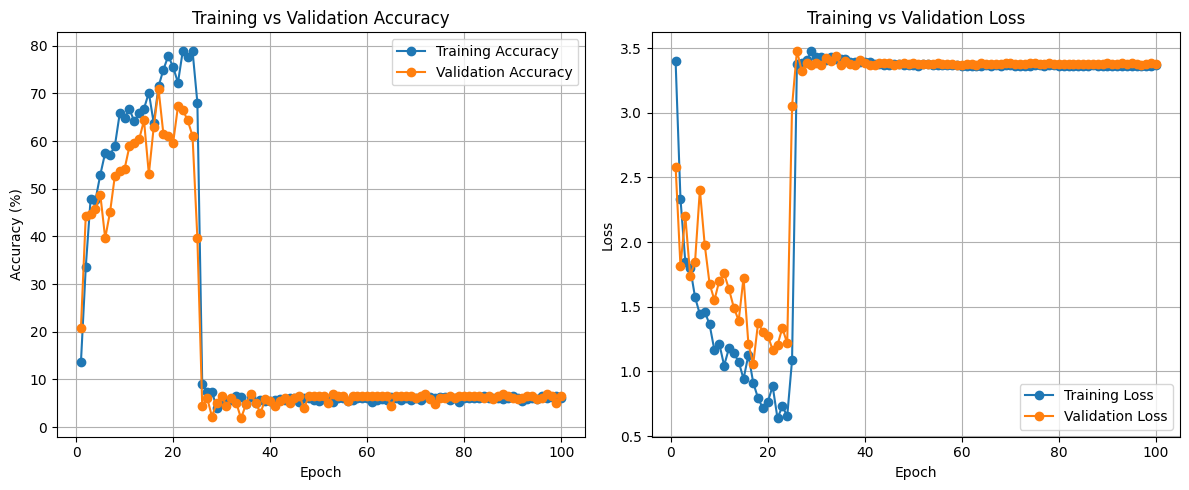

In [24]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(v.parameters(), lr=0.001, momentum=0.9)

# Inisialisasi list untuk menyimpan akurasi dan loss
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
test_accuracy = 0  # Akurasi pengujian hanya dihitung sekali di akhir

num_epochs = 100
for epoch in range(num_epochs):  # loop over the dataset multiple times
    correct = 0
    total = 0
    running_loss = 0.0  # Untuk menghitung training loss per epoch
    
    # Loop untuk setiap batch dalam trainloader
    for i, data in tqdm(enumerate(trainloader, 0), desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = v(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Menghitung jumlah prediksi yang benar
        _, predicted = torch.max(outputs.data, 1)  # Ambil kelas dengan probabilitas tertinggi
        total += labels.size(0)  # Menambah jumlah data yang telah diproses
        correct += (predicted == labels).sum().item()  # Hitung prediksi yang benar

        # Menghitung training loss
        running_loss += loss.item()

    # Akurasi dan loss per epoch pada data pelatihan
    accuracy = 100 * correct / total  # Akurasi dalam persentase
    epoch_loss = running_loss / len(trainloader)  # Rata-rata loss per epoch
    train_accuracies.append(accuracy)
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Accuracy: {accuracy:.2f}%, Training Loss: {epoch_loss:.4f}')

    # Evaluasi pada data validasi
    v.eval()  # Set v ke mode evaluasi
    val_correct = 0
    val_total = 0
    val_running_loss = 0.0  # Untuk menghitung validation loss per epoch
    with torch.no_grad():  # Non-aktifkan perhitungan gradien
        for data in valloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = v(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()  # Menghitung validation loss
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * val_correct / val_total
    val_epoch_loss = val_running_loss / len(valloader)  # Rata-rata validation loss per epoch
    val_accuracies.append(val_accuracy)
    val_losses.append(val_epoch_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {val_epoch_loss:.4f}')

    v.train()  # Kembalikan v ke mode pelatihan

print('Finished Training')

# Evaluasi pada data uji setelah pelatihan selesai
v.eval()  # Set v ke mode evaluasi
test_correct = 0
test_total = 0
with torch.no_grad():  # Non-aktifkan perhitungan gradien
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = v(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Plot grafik perbandingan akurasi dan loss
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o')
# plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy: {test_accuracy:.2f}%')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Create a DataFrame with the training and validation results
results_df = pd.DataFrame({
    'Epoch': list(range(1, num_epochs + 1)),
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies,
    'Training Loss': train_losses,
    'Validation Loss': val_losses
})

# Save the DataFrame to a CSV file
results_csv_path = 'training_results_CAiT.csv'
results_df.to_csv(results_csv_path, index=False)
print(f"Training results saved to {results_csv_path}")

Training results saved to training_results_CAiT.csv


In [26]:
PATH = './model_CAiT.pth'
torch.save(v.state_dict(), PATH)
print(f"Model saved to {PATH}")

Model saved to ./model_CAiT.pth


In [27]:
import torch
import csv
from collections import OrderedDict

# Prepare to count predictions for each class
classes = ['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 
           'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 
           'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 
           'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 
           'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 
           'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 
           'Mangifera Indica (Mango)', 'Mentha (Mint)', 
           'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 
           'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 
           'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 
           'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 
           'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 
           'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 
           'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 
           'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# No gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = v(images.to(device))  # Ganti 'v' dengan 'model' jika perlu
        _, predictions = torch.max(outputs, 1)
        
        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            class_name = classes[label]
            total_pred[class_name] += 1
            if label == prediction:
                correct_pred[class_name] += 1

# Calculate accuracy and prepare data for CSV
results = []
for classname in classes:
    accuracy = 100 * float(correct_pred[classname]) / total_pred[classname] if total_pred[classname] != 0 else 0
    results.append({
        'Class': classname,
        'Correct_Predictions': correct_pred[classname],
        'Total_Predictions': total_pred[classname],
        'Accuracy (%)': round(accuracy, 2)
    })

# Save to CSV
csv_filename = 'conf_matrix_CAiT.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Class', 'Correct_Predictions', 'Total_Predictions', 'Accuracy (%)']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for row in results:
        writer.writerow(row)

print(f"\nConfusion matrix results saved to {csv_filename}")

# Print accuracy for each class
print("\nClass-wise Accuracy:")
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname] if total_pred[classname] != 0 else 0
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Confusion matrix results saved to conf_matrix_CAiT.csv

Class-wise Accuracy:
Accuracy for class: Alpinia Galanga (Rasna) is 0.0 %
Accuracy for class: Amaranthus Viridis (Arive-Dantu) is 100.0 %
Accuracy for class: Artocarpus Heterophyllus (Jackfruit) is 0.0 %
Accuracy for class: Azadirachta Indica (Neem) is 0.0 %
Accuracy for class: Basella Alba (Basale) is 0.0 %
Accuracy for class: Brassica Juncea (Indian Mustard) is 0.0 %
Accuracy for class: Carissa Carandas (Karanda) is 0.0 %
Accuracy for class: Citrus Limon (Lemon) is 0.0 %
Accuracy for class: Ficus Auriculata (Roxburgh fig) is 0.0 %
Accuracy for class: Ficus Religiosa (Peepal Tree) is 0.0 %
Accuracy for class: Hibiscus Rosa-sinensis is 0.0 %
Accuracy for class: Jasminum (Jasmine) is 0.0 %
Accuracy for class: Mangifera Indica (Mango) is 0.0 %
Accuracy for class: Mentha (Mint) is 0.0 %
Accuracy for class: Moringa Oleifera (Drumstick) is 0.0 %
Accuracy for class: Muntingia Calabura (Jamaica Cherry-Gasagase) is 0.0 %
Accuracy for cla

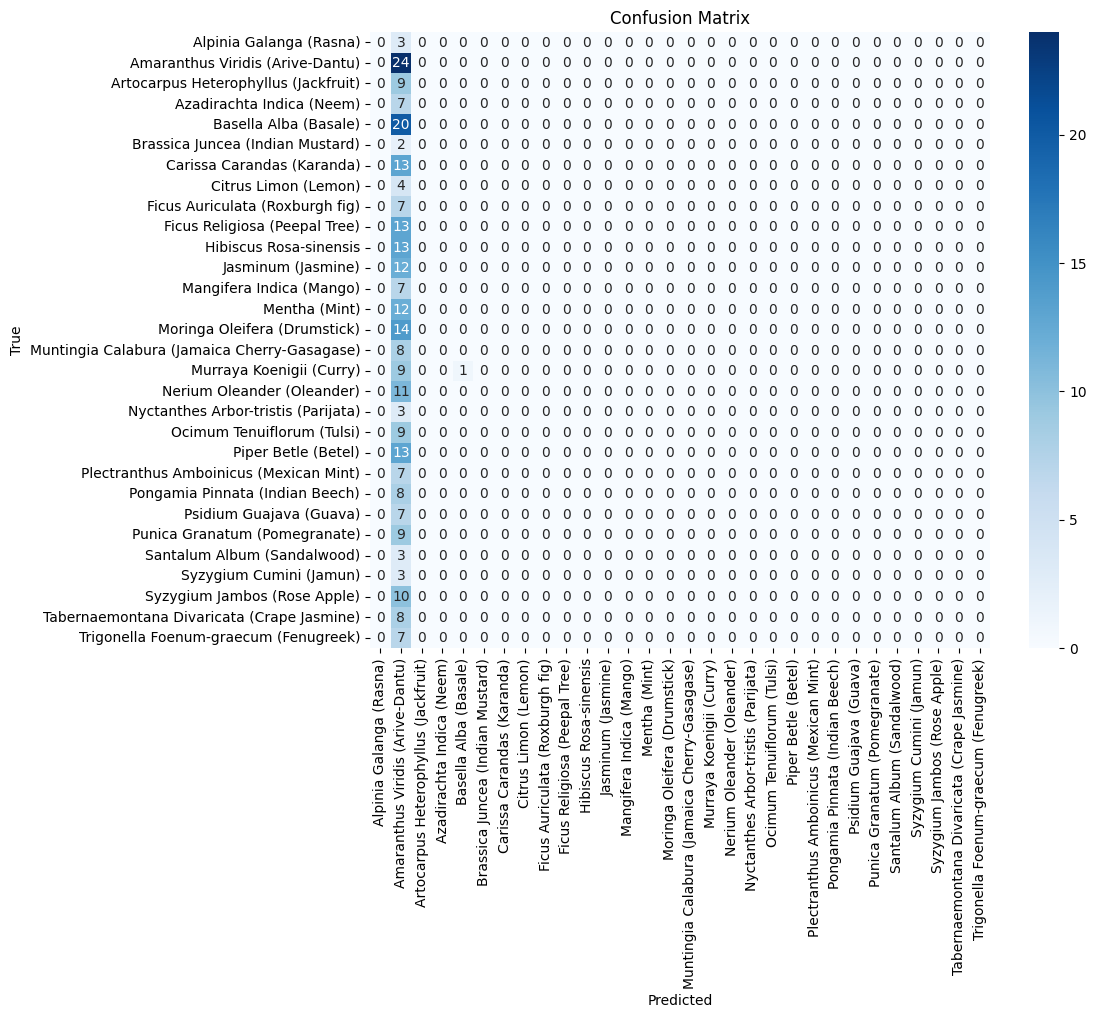

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Mengumpulkan semua label sebenarnya dan prediksi
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = v(images.to(device))
        _, predictions = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Membuat confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()